In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np
from spectacle.analysis.metrics import correlate, npcorrelate, cross_correlate, autocorrelate
from uncertainties import unumpy as unp

ImportError: No module named 'spectacle'

In [5]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [16, 8]

<IPython.core.display.Javascript object>


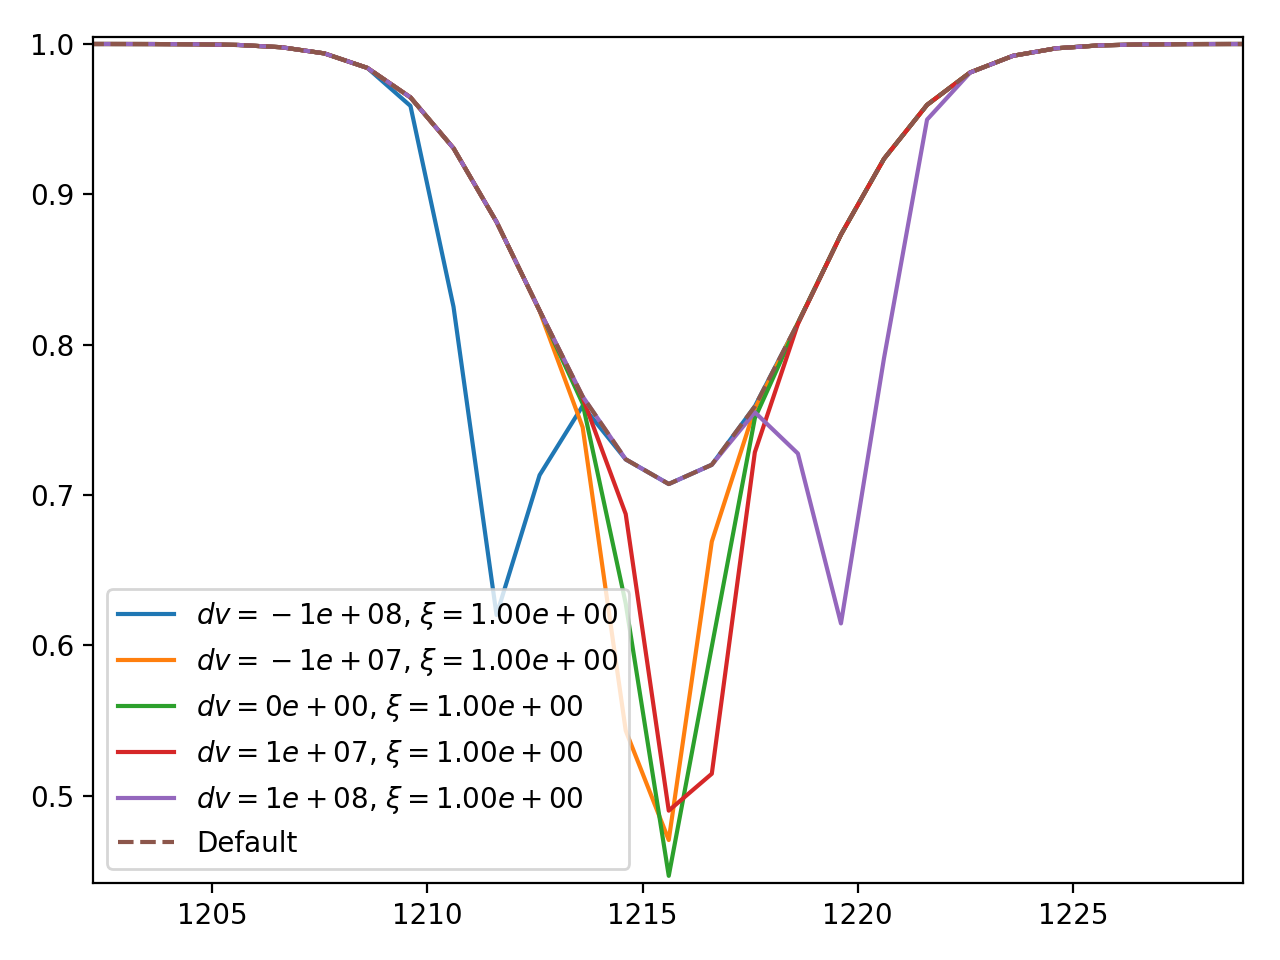

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


0.9999770723731022+/-0
0.999977035826265+/-0
0.999976994547796+/-0
0.9999770266589878+/-0
0.9999769298281799+/-0


In [10]:
f, (ax) = plt.subplots()

# Define dispersion
dispersion = np.linspace(0, 2000, 2000)

spectrum_model1 = Absorption1D()
spectrum_model1.add_line(name="HI1216", 
                         v_doppler=1e8, 
                         column_density=10**14.66)

spectrum1 = spectrum_model1(dispersion)

# spectrum2 = Spectrum1D()
# spectrum2.add_line(name="H1216", 
#                    v_doppler=1e8, 
#                    column_density=10**14.66)
# spectrum2.add_noise(std_dev=0.025)

# Move another feature along velocity space to get correlation values
for dv in [-1e8, -1e7, 0, 1e7, 1e8]:
    spectrum_model3 = Absorption1D()
    spectrum_model3.add_line(name="HI1216", 
                             v_doppler=1e8, 
                             column_density=10**14.66)
    
    spectrum_model3.add_line(name="HI1216", 
                             v_doppler=2.5e7, 
                             column_density=10**14,
                             delta_v=dv)
    
    spectrum3 = spectrum_model3(dispersion)
    
    corr, corr_err, use_mask = correlate(spectrum1, spectrum3)
    corr = unp.uarray(corr, corr_err).sum()
    
    print(corr)
    
    ax.plot(spectrum3.dispersion[use_mask], spectrum3.data[use_mask], 
            label="$dv={:1.0e}$, $\\xi={:1.2e}$".format(dv, corr.nominal_value))

ax.plot(spectrum1.dispersion[use_mask], spectrum1.data[use_mask], '--', label="Default")
# ax.plot(spectrum2.velocity(mask=use_mask), spectrum2.flux[use_mask])

ax.legend(loc=0)

f.tight_layout()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)

spectrum_model1 = Absorption1D()
spectrum_model1.add_line(name="HI1216", 
                   v_doppler=1e8, 
                   column_density=10**14.66)

spectrum1 = spectrum_model1(dispersion)

spectrum_model2 = Absorption1D()
spectrum_model2.add_line(name="HI1216", 
                         v_doppler=1e8, 
                         column_density=10**14.66,
                         delta_v=1e9)

spectrum2 = spectrum_model2(dispersion)
    
corr, corr_err, use_mask = correlate(spectrum1, spectrum2)
corr = unp.uarray(corr, corr_err).sum()
print(corr)

corr, corr_err, use_mask = correlate(spectrum1, spectrum2, use_tau=True)
corr = unp.uarray(corr, corr_err).sum()
print(corr)

ax1.plot(spectrum1.velocity(mask=use_mask), spectrum1.data[use_mask], '--', label="Default")
ax1.plot(spectrum2.velocity(mask=use_mask), spectrum2.data[use_mask])

ax2.plot(spectrum1.velocity(mask=use_mask), spectrum1.tau[use_mask], '--', label="Default")
ax2.plot(spectrum2.velocity(mask=use_mask), spectrum2.tau[use_mask])

f.tight_layout()